# SIR model for the diffusion of an infectious disease with vaccination and quarantine

This exercise explores the diffusion of an infectious disease within a population using an extended SIR (Susceptible, Infected, Removed) model that incorporates the effects of vaccination and quarantine, providing a more comprehensive framework for studying disease control measures. The model divides the population into five compartments-Susceptible (S), Infected (I), Removed (R), Vaccinated (V), and Quarantined (Q)-and simulates disease spread to evaluate the effectiveness of interventions in mitigating the outbreak. By incorporating vaccination, which reduces susceptibility, and quarantine, which isolates infected individuals, the extended model offers valuable insights into the impact of these interventions on controlling disease transmission over time.

## Problem formulation

To analyse the dynamics of the system, a mathematical model is developed to describe the interactions between different compartments. The formulation accounts for key processes influencing the system's evolution, such as transition rates, external influences, and control measures.

### Governing equations

The system of differential equations governing the model dynamics is described by the following set of equations, which model the flow of individuals between the compartments:

1. **Equation for susceptibles ($S$)**

    $$
    \frac{dS}{dt} = -\beta\frac{SI}{N} - \nu S
    $$

    where:

    - $\beta$: infection rate,
    - $\frac{SI}{N}$: probability of contact between susceptible and infected individuals,
    - $\nu$: vaccination rate (individuals transitioning from susceptible to vaccinated).

2. **Equation for infected ($I$)**

    $$
    \frac{dI}{dt} = \beta\frac{SI}{N} - \gamma I - \kappa I - \mu I
    $$

    where:

    - $\beta\frac{SI}{N}$: new infections,
    - $\gamma$: recovery rate (infected individuals transitioning to removed),
    - $\kappa$: quarantine rate (infected individuals transitioning to quarantined),
    - $\mu$: mortality rate (infected individuals transitioning to deceased).

3. **Equation for removed ($R$)**

    $$
    \frac{dR}{dt} = \gamma I
    $$

    where:

    - $\gamma$: recovery rate (infected individuals transitioning to removed).

4. **Equation for vaccinated ($V$)**

    $$
    \frac{dV}{dt} = \nu S
    $$

    where:

    - $\nu$: vaccination rate (susceptible individuals transitioning to vaccinated).

5. **Equation for quarantined ($Q$)**

    $$
    \frac{dQ}{dt} = \kappa I
    $$

    where:

    - $\kappa$: quarantine rate (infected individuals transitioning to quarantined).

6. **Equation for deceased ($D$)**

    $$
    \frac{dD}{dt} = \mu I
    $$

    where:

    - $\mu$: mortality rate (infected individuals transitioning to deceased).

### Initial and boundary conditions

To solve the system, initial conditions are defined for each compartment at the start of the simulation.

#### Initial Conditions:

-   $S_0$: Initial number of susceptible individuals, calculated as the total population minus the initial numbers of infected, vaccinated, quarantined, and deceased individuals.
-   $I_0$: Initial number of infected individuals, typically small but non-zero to simulate the outbreak onset.
-   $R_0$: Initial number of removed individuals, assumed to be zero at the start.
-   $V_0$: Initial number of vaccinated individuals, generally zero unless pre-existing vaccination is assumed.
-   $Q_0$: Initial number of quarantined individuals, either zero or a small value depending on early quarantine measures.
-   $D_0$: Initial number of deceased individuals, assumed to be zero at the start.

### Model Assumptions

1. Closed population: no immigration or emigration is considered, ensuring the total population ($N$) is constant except for reductions due to mortality.
2. No reinfection: vaccinated and quarantined individuals are not reintroduced into the susceptible or infected compartments.
3. Constant rates: the rates of infection ($\beta$), recovery ($\gamma$), vaccination ($\nu$), quarantine ($\kappa$), and mortality ($\mu$) are constant throughout the simulation.
4. Homogeneous mixing: all individuals interact uniformly, with equal chances of contact between any two individuals in the population.
5. Disease-induced mortality: mortality directly reduces the population size over time, accounting for its effect on disease dynamics.


## Implementation

The implementation involves solving a system of ordinary differential equations (ODEs) that model the spread of an infectious disease within a population, incorporating vaccination, quarantine, and mortality as intervention measures. The model is solved using numerical integration techniques to obtain the disease dynamics over time.


### Parameter definition and initialisation

The parameters for the disease dynamics, as well as initial conditions for the compartments (susceptible, infected, recovered, vaccinated, quarantined, and deceased), are defined as follows.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model parameters
beta = 0.4  # Infection rate (probability of transmission per contact)
gamma = 0.02  # Recovery rate (fraction of infected who recover per day)
kappa = 0.05  # Quarantine rate (fraction of infected individuals quarantined per day)
nu = 0.02  # Vaccination rate (fraction of susceptible individuals vaccinated per day)
mu = 0.02  # Mortality rate (fraction of infected individuals who die per day)
N = 1000  # Total population size

# Initial conditions
I0 = 10  # Initial infected individuals
R0 = 0  # Initial removed individuals (recovered)
V0 = 0  # Initial vaccinated individuals
Q0 = 0  # Initial quarantined individuals
D0 = 0  # Initial deceased individuals
S0 = N - I0 - R0 - V0 - Q0 - D0  # Initial number of susceptible individuals
y0 = [S0, I0, R0, V0, Q0, D0]  # Initial state

# Time vector for simulation (days)
t = np.linspace(0, 160, 160)  # Simulate over 160 days


### Differential equations

The extended SIR model is defined as a system of ordinary differential equations (ODEs), encapsulating the dynamics of susceptible, infected, removed, vaccinated, quarantined, and deceased populations.


In [2]:
# Define the model system of differential equations
def model(y, t, beta, gamma, kappa, nu, mu, N):
    """
    Differential equations for the extended SIR model.

    Parameters
    ----------
    y : array
        The state variables [S, I, R, V, Q, D].
    t : array
        The time points for the simulation.
    beta : float
        The infection rate (probability of transmission per contact).
    gamma : float
        The recovery rate (fraction of infected who recover per day).
    kappa : float
        The quarantine rate (fraction of infected individuals quarantined per day).
    nu : float
        The vaccination rate (fraction of susceptible individuals vaccinated per day).
    mu : float
        The mortality rate (fraction of infected individuals who die per day).
    N : float
        The total population size.

    Returns
    -------
    array
        The model equations.
    """
    S, I, R, V, Q, D = y
    dSdt = -beta * S * I / N - nu * S
    dIdt = beta * S * I / N - gamma * I - kappa * I - mu * I
    dRdt = gamma * I
    dVdt = nu * S
    dQdt = kappa * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dVdt, dQdt, dDdt]


## Results


### Baseline scenario: no vaccination or quarantine

In the absence of vaccination and quarantine ($\nu = 0, \kappa = 0$), the disease spreads uninhibited, leading to a large outbreak. This scenario serves as a baseline for comparison.


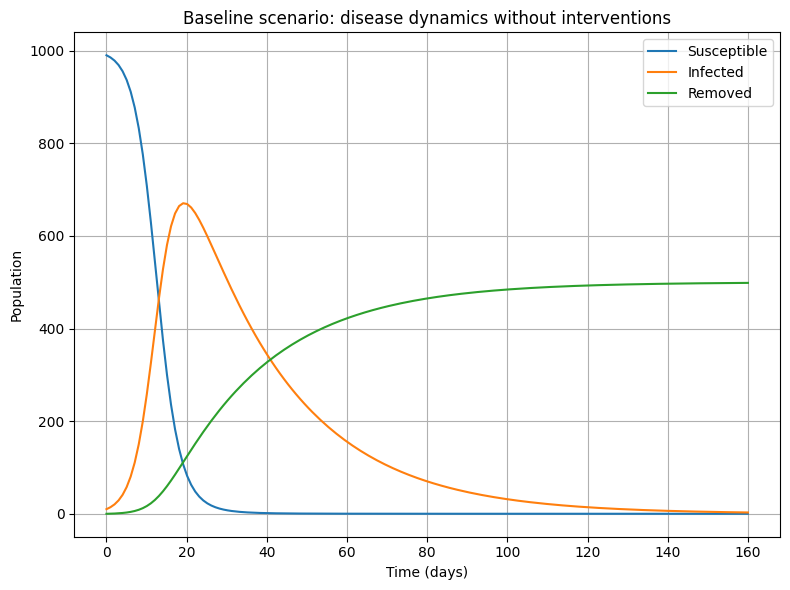

In [3]:
# Baseline simulation
baseline_solution = odeint(model, y0, t, args=(beta, gamma, 0, 0, mu, N))
S, I, R, V, Q, D = baseline_solution.T

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, S, label="Susceptible", linewidth=1.5)
plt.plot(t, I, label="Infected", linewidth=1.5)
plt.plot(t, R, label="Removed", linewidth=1.5)

# Plot settings
plt.title("Baseline scenario: disease dynamics without interventions")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Impact of vaccination on epidemic dynamics

Simulations reveal that increasing the vaccination rate significantly reduces both the peak number of infections and the total number of individuals infected over the course of the outbreak.


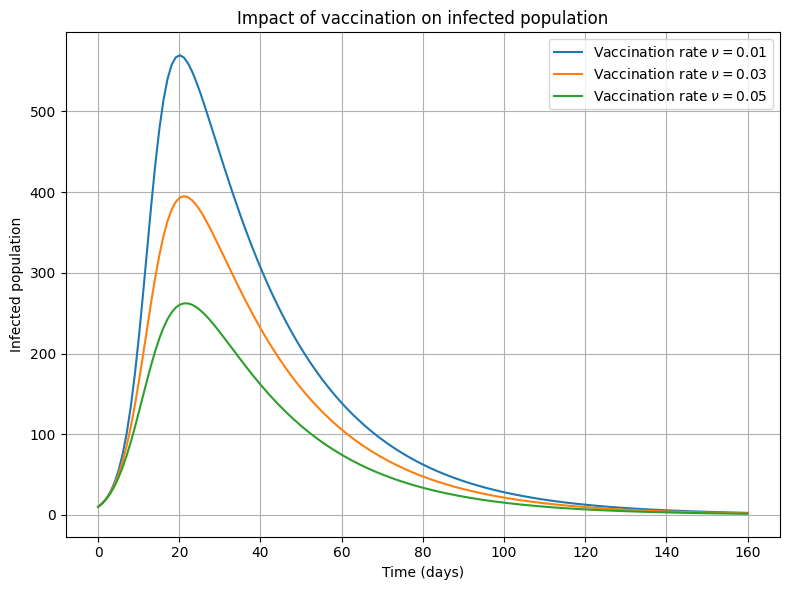

In [4]:
# Define vaccination rates to test
nu_values = [0.01, 0.03, 0.05]

# Prepare the figure
plt.figure(figsize=(8, 6))

for nu in nu_values:
    # Solve the model
    solution = odeint(model, y0, t, args=(beta, gamma, 0, nu, mu, N))
    I = solution[:, 1]
    plt.plot(t, I, linewidth=1.5, label=rf"Vaccination rate $\nu = {nu:.2f}$")

# Plot settings
plt.title("Impact of vaccination on infected population")
plt.xlabel("Time (days)")
plt.ylabel("Infected population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Impact of quarantine on epidemic dynamics

When quarantine is introduced ($\kappa>0$), the rate of infection slows, as a portion of infected individuals are isolated. This reduces the overall transmission of the disease, and as seen in the simulation, the number of infected individuals is lower than in the baseline scenario.


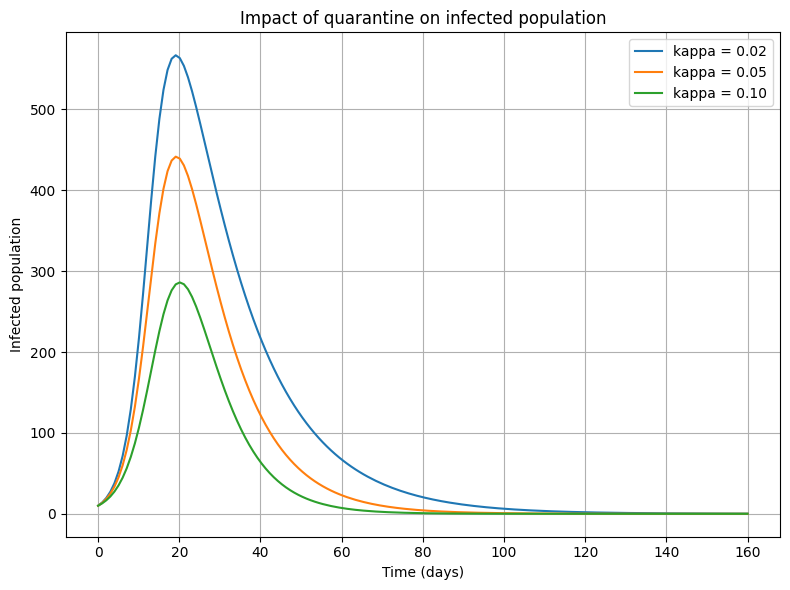

In [5]:
# Define quarantine rates to test
kappa_values = [0.02, 0.05, 0.1]

# Create the plot
plt.figure(figsize=(8, 6))

for kappa in kappa_values:
    # Solve the model
    solution = odeint(model, y0, t, args=(beta, gamma, kappa, 0, mu, N))
    I = solution[:, 1]
    plt.plot(t, I, linewidth=1.5, label=f"kappa = {kappa:.2f}")

# Plot settings
plt.title("Impact of quarantine on infected population")
plt.xlabel("Time (days)")
plt.ylabel("Infected population")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Combined effect of vaccination and quarantine

When both vaccination and quarantine measures are introduced, the disease is controlled more effectively, with a significant reduction in the number of infected individuals and deaths.


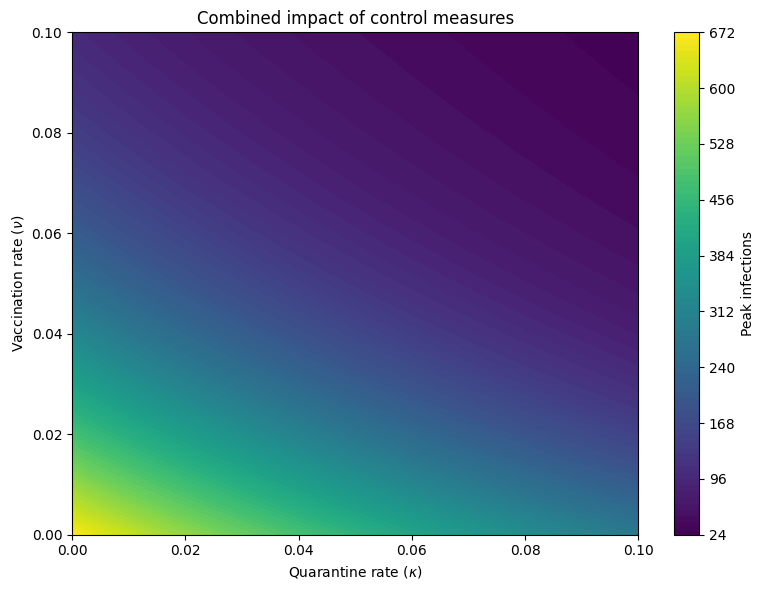

In [6]:
# Create an empty matrix to store peak infections
nu_values = np.linspace(0, 0.1, 50)
kappa_values = np.linspace(0, 0.1, 50)
peak_infections = np.zeros((len(nu_values), len(kappa_values)))

for i, nu in enumerate(nu_values):
    for j, kappa in enumerate(kappa_values):
        # Solve the model
        solution = odeint(model, y0, t, args=(beta, gamma, kappa, nu, mu, N))
        I = solution[:, 1]
        # Record the peak number of infections
        peak_infections[i, j] = np.max(I)

# Create the plot
plt.figure(figsize=(8, 6))
plt.contourf(kappa_values, nu_values, peak_infections, cmap="viridis", levels=100)
plt.colorbar(label="Peak infections")

# Plot settings
plt.xlabel(r"Quarantine rate ($\kappa$)")
plt.ylabel(r"Vaccination rate ($\nu$)")
plt.title("Combined impact of control measures")
plt.tight_layout()
plt.show()


### Cumulative deaths

The number of cumulative deaths over time is critical in assessing the severity of the epidemic and the effectiveness of interventions. This graph visualises how cumulative deaths depend on the vaccination rate and quarantine rate. It provides a comprehensive view of the combined effects of these interventions, enabling informed decision-making.


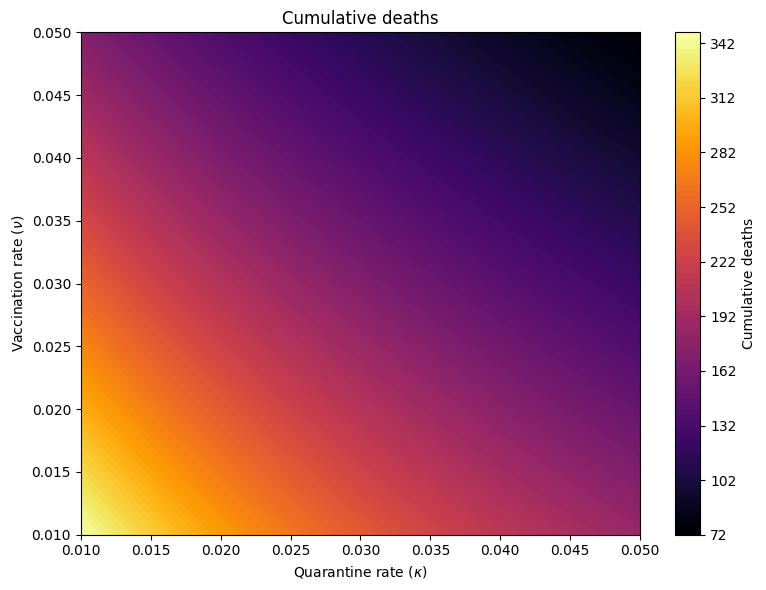

In [7]:
# Define parameter ranges
nu_values = np.linspace(0.01, 0.05, 50)  # Vaccination rates
kappa_values = np.linspace(0.01, 0.05, 50)  # Quarantine rates

# Initialise a matrix to store cumulative deaths
cumulative_deaths = np.zeros((len(nu_values), len(kappa_values)))

for i, nu in enumerate(nu_values):
    for j, kappa in enumerate(kappa_values):
        # Solve the model
        solution = odeint(model, y0, t, args=(beta, gamma, kappa, nu, mu, N))
        D = solution[:, 5]
        # Final value of D represents cumulative deaths
        cumulative_deaths[i, j] = D[-1]

# Create a figure
plt.figure(figsize=(8, 6))
plt.contourf(kappa_values, nu_values, cumulative_deaths, cmap="inferno", levels=100)
plt.colorbar(label="Cumulative deaths")

# Plot settings
plt.title("Cumulative deaths")
plt.xlabel(r"Quarantine rate ($\kappa$)")
plt.ylabel(r"Vaccination rate ($\nu$)")
plt.grid(False)
plt.tight_layout()
plt.show()